In [220]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Generate 100 data points
years = np.random.choice(range(2000, 2024), 100)           # Years from 2000 to 2023
months = np.random.choice(range(1, 13), 100)               # Months from 1 to 12
interest_rates = np.round(np.random.uniform(1.0, 5.0, 100), 2)  # Interest rate between 1% and 5%
unemployment_rates = np.round(np.random.uniform(3.0, 15.0, 100), 2)  # Unemployment rate between 3% and 15%

# Creating a linear relationship with some added noise for Index Price as the target
# Assuming: Index_Price = 50 * Interest_Rate - 20 * Unemployment_Rate + noise
index_prices = 50 * interest_rates - 20 * unemployment_rates + np.random.normal(0, 10, 100)  # Adding some noise

# Create DataFrame
econ_data = pd.DataFrame({
    "Year": years,
    "Month": months,
    "Interest_Rate": interest_rates,
    "Unemployment_Rate": unemployment_rates,
    "Index_Price": index_prices
})

# Save to CSV
econ_data.to_csv("economics_data_for_regression.csv", index=False)


In [221]:
df = pd.read_csv('economics_data_for_regression.csv')
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price
0,2012,6,1.08,11.25,-159.476684
1,2015,6,2.21,5.59,9.496186
2,2021,1,3.64,14.37,-113.533643
3,2000,2,2.16,11.77,-142.064243
4,2003,6,3.47,6.05,57.710649


In [222]:
df.isnull().sum()

Year                 0
Month                0
Interest_Rate        0
Unemployment_Rate    0
Index_Price          0
dtype: int64

In [223]:
df_index = df.drop(columns= ["Month" , "Year" ] , axis= 1)
df_index.head()

,Interest_Rate,Unemployment_Rate,Index_Price
0,1.08,11.25,-159.476684
1,2.21,5.59,9.496186
2,3.64,14.37,-113.533643
3,2.16,11.77,-142.064243
4,3.47,6.05,57.710649


Text(0, 0.5, 'Index_price')

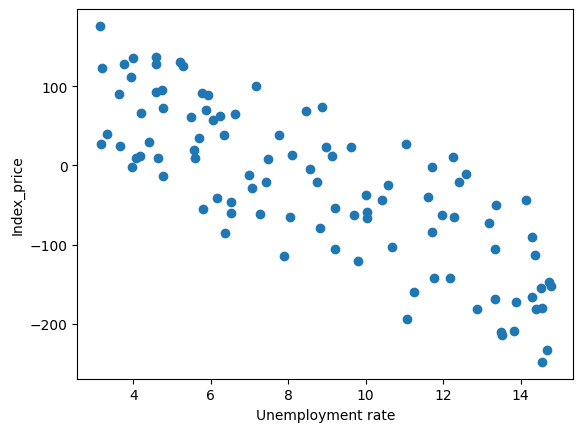

In [224]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.scatter(df_index['Unemployment_Rate' ] , df_index['Index_Price'])
plt.xlabel('Unemployment rate')
plt.ylabel('Index_price')

Text(0, 0.5, 'Index_price')

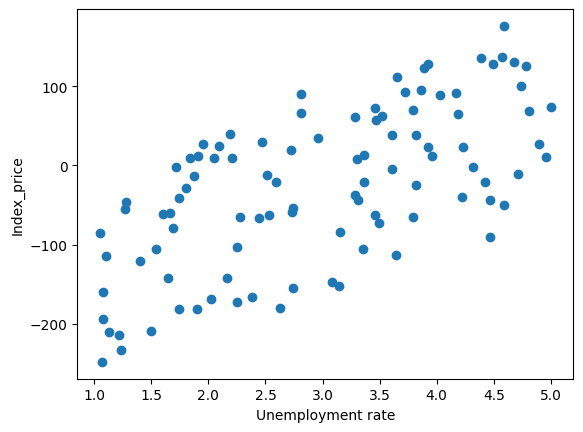

In [225]:
plt.scatter(df_index['Interest_Rate' ] , df_index['Index_Price'])
plt.xlabel('Unemployment rate')
plt.ylabel('Index_price')

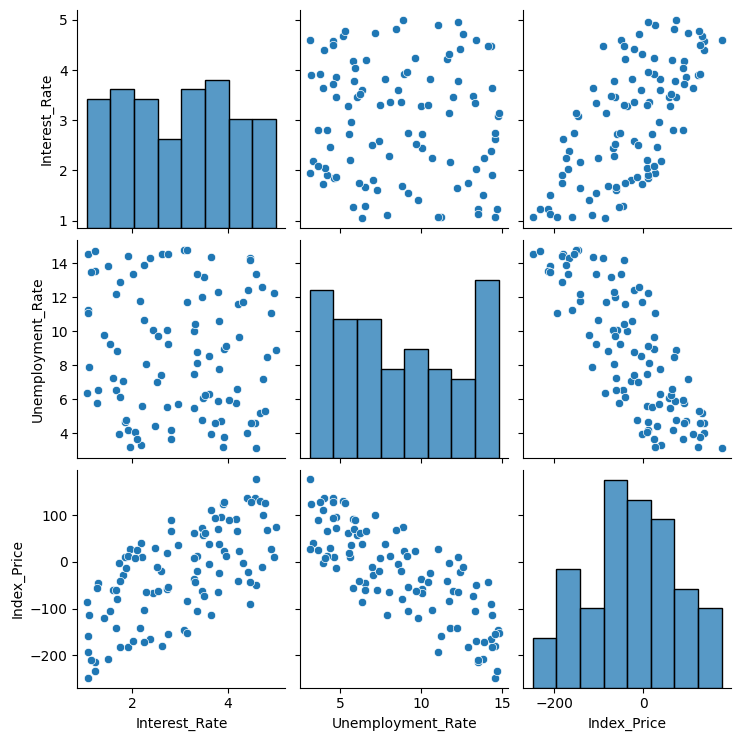

In [226]:
import seaborn as sns       
sns.pairplot(df_index)

In [227]:
df_index.corr()

,Interest_Rate,Unemployment_Rate,Index_Price
Interest_Rate,1.000000,-0.074442,0.648419
Unemployment_Rate,-0.074442,1.000000,-0.800622
Index_Price,0.648419,-0.800622,1.000000


Text(0, 0.5, 'Unemployment Rate ')

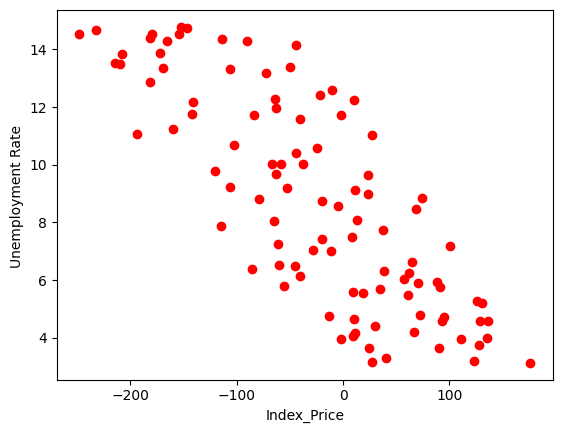

In [228]:
# Visiualize the datapoints moew closely 

plt.scatter(df_index['Index_Price'] , df_index['Unemployment_Rate'] , color= 'red')
plt.xlabel('Index_Price')
plt.ylabel('Unemployment Rate ')

In [229]:
# Independent and Dependent Feature 
X= df_index.iloc[: , : -1]
y = df_index.iloc[: ,-1]

In [230]:
# Train TesT Split 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.25 , random_state= 42 )

In [231]:
import seaborn as sns      



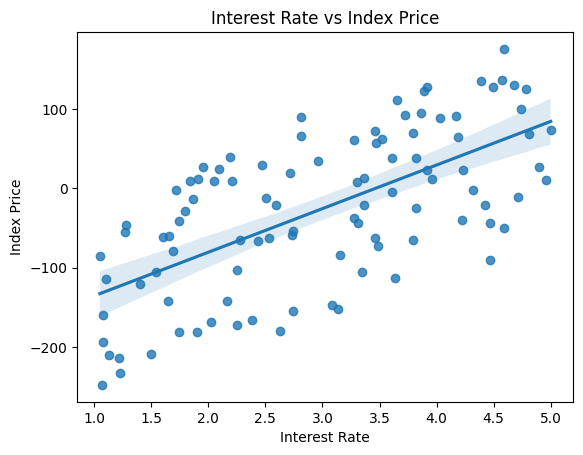

In [232]:

sns.regplot(x='Interest_Rate', y='Index_Price', data=df_index)

plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.title('Interest Rate vs Index Price')

plt.show()


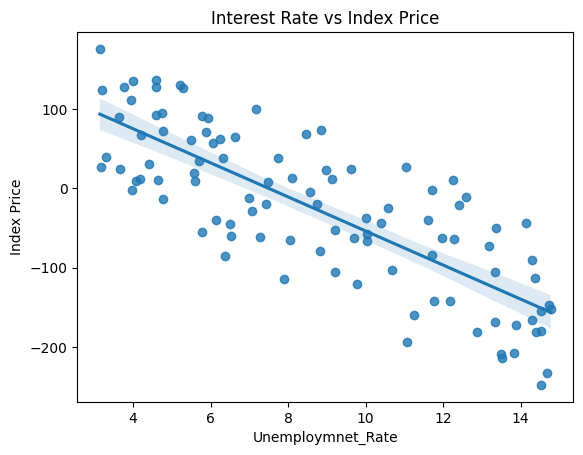

In [233]:
sns.regplot(x='Unemployment_Rate', y='Index_Price', data=df_index)

plt.xlabel('Unemploymnet_Rate')
plt.ylabel('Index Price')
plt.title('Interest Rate vs Index Price')

plt.show()

In [234]:
from sklearn.preprocessing import StandardScaler


In [235]:
scalar  = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [236]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [237]:
regression.fit(X_train , y_train)

LinearRegression()

In [238]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression , X_train , y_train , scoring='neg_mean_squared_error' , cv= 3)

In [239]:
np.mean(validation_score)

np.float64(-90.08241557385611)

In [240]:
## Prediction 
y_pred = regression.predict(X_test)
y_pred

array([ 178.04867639, -204.72663345,   20.28208928, -200.71089181,
       -129.4330233 ,  -14.91099246,  108.87818075,  104.68309801,
         25.58544315, -162.8145411 ,   -8.87784396,   30.74779705,
       -142.88288385,  -58.45694903,  -37.79530018,   62.88622602,
         -5.16350262,   14.51785395,   64.5002303 ,  -25.47252023,
        -77.84979511, -159.04219564, -152.07380353,  131.21124709,
         43.90270219])

In [241]:
# Performance Metrices 
from sklearn.metrics import mean_absolute_error , mean_squared_error
mae = mean_squared_error(y_test , y_pred)
mse = mean_absolute_error(y_test , y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error ",mse)
print("Mean absolute Error " , mae)
print("Root Mean Squared Error : " , rmse)

Mean Squared Error  12.768616305259354
Mean absolute Error  239.05262569817754
Root Mean Squared Error :  3.5733200675645267


In [242]:
from sklearn.metrics import r2_score
score = r2_score(y_test , y_pred)
print(score)

0.9783661553714535


In [243]:
#  Display adjusted r 
1 - (1 - score)* (len(y_test) -1 )/(len(y_test) - X_test.shape[1]-1)

0.9763994422234039